Notebook Title:
Author:                    Rucmanidevi Sethu 
Link to GitHub Repository:
## Part 1 - Chart a Straight Line

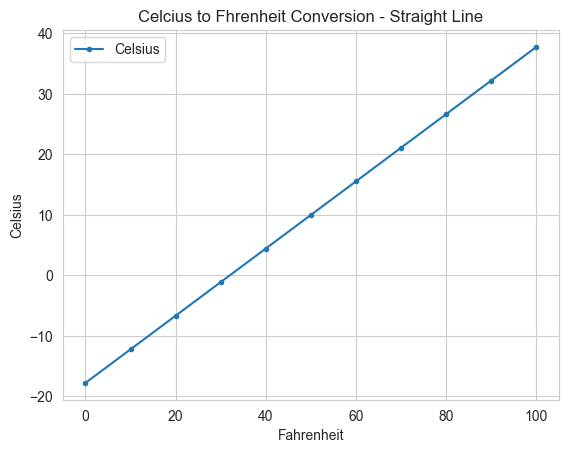

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats

#Fahrenheit to Celsius conversion using a lambda function
c=lambda f:5/9*(f-32)

# Generate Fahrenheit temperatures from 0 to 100 in steps of 10
temps = [(f, c(f)) for f in range (0,101,10)]

# Create a Dataframe from the temperature data 
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])

# Plot using pandas built -in plotting 
axes = temps_df.plot(x='Fahrenheit', y= 'Celsius', style = '.-')

# Label the y-axis
axes.set_title('Celcius to Fhrenheit Conversion - Straight Line')
y_label = axes.set_ylabel('Celsius')

#Show the plot
plt.show()





## NYC January Temperature Prediction

## Part 2 - Prediction

Section 1: Data Acquisition


In [44]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
nyc_df = pd.read_csv('C:/Repos/datafun-07-ml/documents/Chapter-15/ave_hi_nyc_jan_1895-2018.csv')




Section 2 -Data Inspection

In [45]:
print("Head of the Dataframe:")
print(nyc_df.head())
print("\nTail of the DataFrame:")
print(nyc_df.tail())


Head of the Dataframe:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail of the DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


Section 3 - Data Cleansing


In [46]:
nyc_df.rename(columns={'Value': 'Temperature'}, inplace = True)
nyc_df['Date'] = nyc_df['Date'] // 100
print(nyc_df)

     Date  Temperature  Anomaly
0    1895         34.2     -3.2
1    1896         34.7     -2.7
2    1897         35.5     -1.9
3    1898         39.6      2.2
4    1899         36.4     -1.0
..    ...          ...      ...
119  2014         35.5     -1.9
120  2015         36.1     -1.3
121  2016         40.8      3.4
122  2017         42.8      5.4
123  2018         38.7      1.3

[124 rows x 3 columns]


Section 4 - Descriptive Statistics

In [47]:
pd.set_option('display.precision',2)
print("\nDescriptive statistics for Temperature:")
print(nyc_df['Temperature'].describe())



Descriptive statistics for Temperature:
count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


Section 5 - Build the Model

In [48]:
linear_regression = stats.linregress(x=nyc_df['Date'], y=nyc_df['Temperature'])


Section 6 - Predict

In [49]:
year_to_predict = 2024
predicted_temp = linear_regression.slope*year_to_predict + linear_regression.intercept
print(f"\nPredicted average high temperature in NYC for January {year_to_predict}:{predicted_temp:2f}°F")


Predicted average high temperature in NYC for January 2024:38.592228°F


In [55]:

linear_regression_scipy = stats.linregress(
    x=nyc_df['Date'], 
    y=nyc_df['Temperature']
)

year_to_predict = 1890
slope_scipy = linear_regression_scipy.slope
intercept_scipy = linear_regression_scipy.intercept
predicted_temp_scipy_1890 = (slope_scipy * year_to_predict) + intercept_scipy

print(f"Predicted Avg High Temp for January {year_to_predict}: {predicted_temp_scipy_1890:.2f}°F")

Predicted Avg High Temp for January 1890: 36.61°F


Section 7 - Visualizations

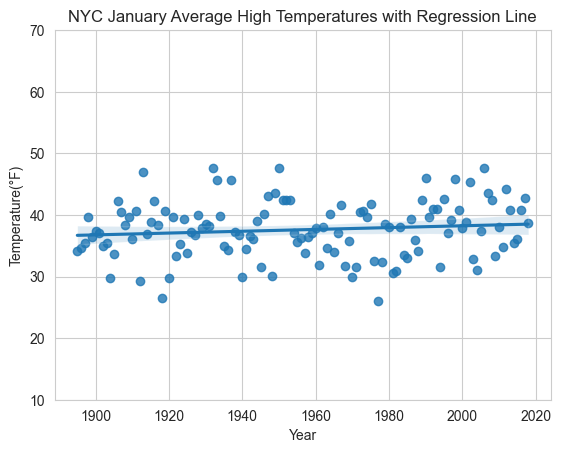

In [ ]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df['Date'], y =nyc_df['Temperature'])
axes.set_ylabel('Temperature(°F)')
axes.set_xlabel('Year')
axes.set_title('NYC January Average High Temperatures with Regression Line')
axes.set_ylim(10,70)
plt.show()

Part 3 - Prediction

In [ ]:
# Section 1 - Build the Model
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Load and clean data
df = pd.read_csv('C:/Repos/datafun-07-ml/documents/Chapter-15/ave_hi_nyc_jan_1895-2018.csv')
df.rename(columns={'Value': 'Temperature'}, inplace = True)
df['Date'] = df['Date']//100
# Split the data
X_train,X_test,y_train,y_test = train_test_split(df[['Date']],df['Temperature'], random_state = 11, test_size =0.25)
# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=y_train)
# View slope and intercept
print(f"Slope (coef_): {linear_regression.coef_[0]:.4f}")
print(f"Intercept(intercept_): {linear_regression.intercept_:.4f}")


Slope (coef_): 0.0194
Intercept(intercept_): -0.3078


Section 2 - Test the Model

Test our model’s performance by predicting temperatures on the test data and comparing the predicted vs. actual values.

In [ ]:
predicted = linear_regression.predict(X_test)
comparison = pd.DataFrame({'Year': X_test['Date'], 'Actual' : y_test, 'Predicted': predicted})
print("\nPredicted vs Actual(every 5th sample):")
print(comparison.iloc[::5])


Predicted vs Actual(every 5th sample):
     Year  Actual  Predicted
73   1968    31.7      37.86
116  2011    34.8      38.69
29   1924    39.4      37.00
42   1937    45.7      37.25
83   1978    32.3      38.05
62   1957    33.8      37.64
26   1921    39.7      36.94


In [60]:
# Section 3 - Predict
year_to_predict = 1890
input_df = pd.DataFrame({'Date': [year_to_predict]})
predicted_temp_1890 = linear_regression.predict(input_df)[0]
print(f"\nPredicted averge high temperature in NYC for January {year_to_predict}: {predicted_temp_1890:.2f}°F")


Predicted averge high temperature in NYC for January 1890: 34.83°F


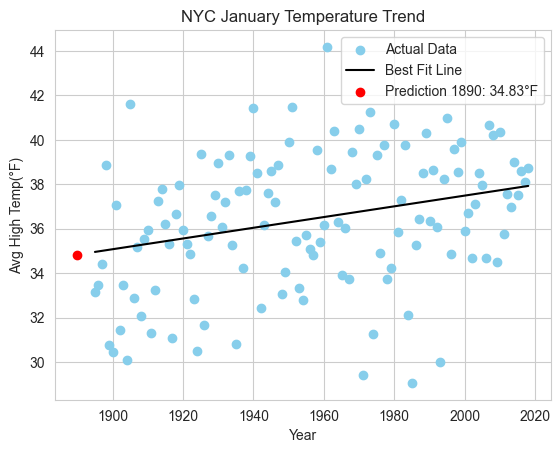

In [61]:
# Plot regression line
x_vals = pd.DataFrame({'Date': [df['Date'].min(),df['Date'].max()]})
y_vals =linear_regression.predict(x_vals)

plt.scatter(df['Date'],df['Temperature'],color= 'skyblue', label ='Actual Data')
plt.plot(x_vals['Date'],y_vals,color='black',label='Best Fit Line')
plt.scatter(year_to_predict, predicted_temp_1890, color='red',
            label=f'Prediction {year_to_predict}: {predicted_temp_1890:.2f}°F')

plt.xlabel('Year')
plt.ylabel('Avg High Temp(°F)')
plt.title('NYC January Temperature Trend')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Section 3 - Predict
year_to_predict = 2024
input_df = pd.DataFrame({'Date': [year_to_predict]})
predicted_temp_2024 = linear_regression.predict(input_df)[0]
print(f"\nPredicted averge high temperature in NYC for January {year_to_predict}: {predicted_temp_2024:.2f}°F")


Predicted averge high temperature in NYC for January 2024: 38.94°F


Text(0, 0.5, 'Temperature(°F)')

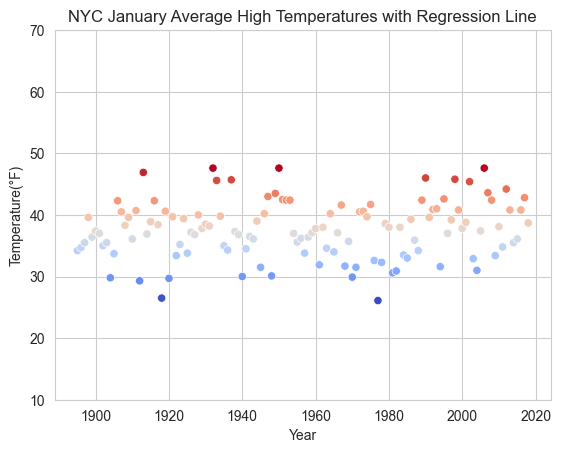

In [ ]:
# Section 4 - Visualizations
sns.set_style('whitegrid')
axes = sns.scatterplot(data=df, x='Date', y= 'Temperature', hue = 'Temperature', palette = 'coolwarm', legend =False)
axes.set_ylim(10,70)
axes.set_title('NYC January Average High Temperatures with Regression Line')
axes.set_xlabel('Year')
axes.set_ylabel('Temperature(°F)')


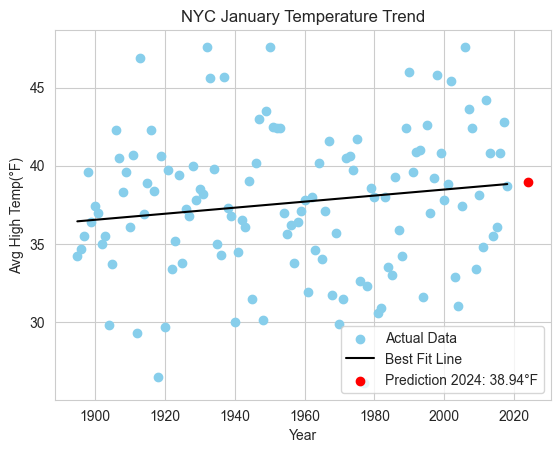

In [ ]:
# Plot regression line
x_vals = pd.DataFrame({'Date': [df['Date'].min(),df['Date'].max()]})
y_vals =linear_regression.predict(x_vals)

plt.scatter(df['Date'],df['Temperature'],color= 'skyblue', label ='Actual Data')
plt.plot(x_vals['Date'],y_vals,color='black',label='Best Fit Line')
plt.scatter(year_to_predict, predicted_temp_2024, color='red',
            label=f'Prediction {year_to_predict}: {predicted_temp_2024:.2f}°F')

plt.xlabel('Year')
plt.ylabel('Avg High Temp(°F)')
plt.title('NYC January Temperature Trend')
plt.legend()
plt.grid(True)
plt.show()
